In [1]:
from PIL import Image
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder,filename))
        images.append(img)
    return images

In [3]:
cardboard_images = load_images_from_folder("D:\Machine Learning Basics\Garbage Classification\Garbage classification\cardboard")
glass_images = load_images_from_folder("D:\Machine Learning Basics\Garbage Classification\Garbage classification\glass")
metal_images = load_images_from_folder("D:\Machine Learning Basics\Garbage Classification\Garbage classification\metal")
paper_images = load_images_from_folder("D:\Machine Learning Basics\Garbage Classification\Garbage classification\paper")
plastic_images = load_images_from_folder("D:\Machine Learning Basics\Garbage Classification\Garbage classification\plastic")

In [4]:
cardboard_images,glass_images,metal_images,paper_images,plastic_images

([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165338E80>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165338F28>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429278>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x181654295F8>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429668>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x181654296D8>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429748>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x181654297B8>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429828>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429898>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429908>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=64x64 at 0x18165429978>,
  <PIL.JpegImage

In [5]:
cardboard = np.asarray(cardboard_images[0])
glass = np.asarray(glass_images[0])
metal = np.asarray(metal_images[0])
paper = np.asarray(paper_images[0])
plastic = np.asarray(plastic_images[0])

In [6]:
cardboard.shape,glass.shape,metal.shape,paper.shape,plastic.shape

((64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3), (64, 64, 3))

In [7]:
cardboard = np.reshape(cardboard,(1,64,64,3))
glass = np.reshape(glass,(1,64,64,3))
metal = np.reshape(metal,(1,64,64,3))
paper = np.reshape(paper,(1,64,64,3))
plastic = np.reshape(plastic,(1,64,64,3))

In [8]:
for i in range(1,len(cardboard_images)):
    cardboard_images[i] = np.asarray(cardboard_images[i])
    cardboard_images[i] = np.reshape(cardboard_images[i],(1,64,64,3))
    cardboard = np.append(cardboard, cardboard_images[i], axis = 0)

for i in range(1,len(glass_images)):
    glass_images[i] = np.asarray(glass_images[i])
    glass_images[i] = np.reshape(glass_images[i],(1,64,64,3))
    glass = np.append(glass, glass_images[i], axis = 0)

for i in range(1,len(metal_images)):
    metal_images[i] = np.asarray(metal_images[i])
    metal_images[i] = np.reshape(metal_images[i],(1,64,64,3))
    metal = np.append(metal, metal_images[i], axis = 0)

for i in range(1,len(paper_images)):
    paper_images[i] = np.asarray(paper_images[i])
    paper_images[i] = np.reshape(paper_images[i],(1,64,64,3))
    paper = np.append(paper, paper_images[i], axis = 0)

for i in range(1,len(plastic_images)):
    plastic_images[i] = np.asarray(plastic_images[i])
    plastic_images[i] = np.reshape(plastic_images[i],(1,64,64,3))
    plastic = np.append(plastic, plastic_images[i], axis = 0)

In [9]:
cardboard

array([[[[250, 203, 177],
         [247, 200, 174],
         [250, 204, 178],
         ...,
         [211, 167, 140],
         [214, 170, 143],
         [217, 173, 146]],

        [[248, 201, 175],
         [246, 199, 173],
         [248, 202, 176],
         ...,
         [212, 168, 141],
         [215, 171, 144],
         [217, 173, 146]],

        [[245, 199, 173],
         [243, 197, 171],
         [247, 201, 175],
         ...,
         [212, 168, 141],
         [215, 171, 144],
         [218, 174, 147]],

        ...,

        [[173, 139, 114],
         [173, 139, 114],
         [172, 138, 113],
         ...,
         [112,  90,  67],
         [111,  89,  66],
         [110,  88,  65]],

        [[176, 142, 117],
         [173, 139, 114],
         [170, 136, 111],
         ...,
         [113,  91,  68],
         [112,  90,  67],
         [111,  89,  66]],

        [[179, 145, 120],
         [175, 141, 116],
         [170, 136, 111],
         ...,
         [113,  91,  68],
        

In [10]:
cardboard.shape

(403, 64, 64, 3)

In [11]:
# append all arrays in a single array

In [12]:
cardboard = np.append(cardboard,glass,axis = 0)
cardboard = np.append(cardboard,metal,axis = 0)
cardboard = np.append(cardboard,paper,axis = 0)
cardboard = np.append(cardboard,plastic,axis = 0)

In [13]:
glass.shape, metal.shape, paper.shape, plastic.shape

((501, 64, 64, 3), (410, 64, 64, 3), (594, 64, 64, 3), (482, 64, 64, 3))

In [14]:
# classifying as data and target
data = cardboard

In [15]:
# Applying PCA for dimension resuction

In [16]:
cardboard_output = np.ones(403,np.uint8)
glass_output = np.zeros(glass.shape[0],np.uint8)
metal_output = np.zeros(metal.shape[0],np.uint8)
paper_output = np.ones(paper.shape[0],np.uint8)
plastic_output = np.zeros(plastic.shape[0],np.uint8)

In [17]:
cardboard_output.shape,glass_output.shape

((403,), (501,))

In [18]:
cardboard_output = np.append(cardboard_output,glass_output,axis = 0)
cardboard_output = np.append(cardboard_output,metal_output,axis = 0)
cardboard_output = np.append(cardboard_output,paper_output,axis = 0)
cardboard_output = np.append(cardboard_output,plastic_output,axis = 0)

In [19]:
cardboard_output.shape,cardboard.shape

((2390,), (2390, 64, 64, 3))

In [20]:
x = cardboard
y = cardboard_output

In [21]:
x.shape,y.shape

((2390, 64, 64, 3), (2390,))

In [22]:
from sklearn.model_selection import train_test_split
# 1 for biodegeradable
# 0 for non-biodegradable

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [24]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# model creation

In [25]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


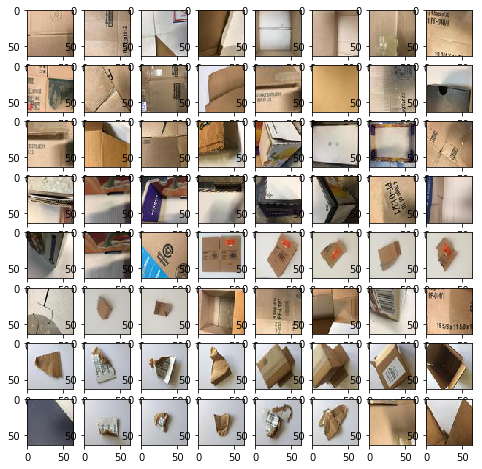

In [26]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x[i],plt.cm.bone)
plt.show()

In [27]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [28]:
model = Sequential()

In [34]:
layer1 = Dense(units = 128,activation = 'relu',input_dim = 12288)
model.add(layer1)
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dense(units = 32,activation = 'tanh'))
model.add(Dense(units = 16,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [35]:
model.compile(optimizer='adam',loss='binary_crossentropy' , metrics = ['accuracy'])

In [36]:
model.fit(x_train,y_train,epochs = 25,batch_size = 50,validation_data = (x_test,y_test))

Train on 1792 samples, validate on 598 samples
Epoch 1/25
1792/1792 [==============================] - 1s 592us/step - loss: 0.6923 - acc: 0.5686 - val_loss: 0.6908 - val_acc: 0.5920
Epoch 2/25
1792/1792 [==============================] - 0s 230us/step - loss: 0.6902 - acc: 0.5798 - val_loss: 0.6887 - val_acc: 0.5920
Epoch 3/25
1792/1792 [==============================] - 0s 230us/step - loss: 0.6885 - acc: 0.5798 - val_loss: 0.6868 - val_acc: 0.5920
Epoch 4/25
1792/1792 [==============================] - 0s 228us/step - loss: 0.6870 - acc: 0.5798 - val_loss: 0.6852 - val_acc: 0.5920
Epoch 5/25
1792/1792 [==============================] - 0s 225us/step - loss: 0.6858 - acc: 0.5798 - val_loss: 0.6838 - val_acc: 0.5920
Epoch 6/25
1792/1792 [==============================] - 0s 228us/step - loss: 0.6848 - acc: 0.5798 - val_loss: 0.6826 - val_acc: 0.5920
Epoch 7/25
1792/1792 [==============================] - 0s 230us/step - loss: 0.6840 - acc: 0.5798 - val_loss: 0.6817 - val_acc: 0.5920
E

In [37]:
predictions = model.predict(x_test)

In [38]:
score = model.evaluate(x_test,y_test)
score

598/598 [==============================] - 0s 100us/step


[0.6767223489324384, 0.5919732441471572]